<a href="https://colab.research.google.com/github/Alexandr477/Charts/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
import category_encoders as ce
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/ds_salaries.csv') # Открываем данные


display(data)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:

duplicate_rows = data.duplicated()
#print(duplicate_rows) # Проверяем на наличие дубликатов, не обнаружено
data_scien=data[data['job_title']=='Data Scientist']  # выделяем отдельно специалистов Data Scientist

#EN — Entry-level/Junior;
#MI — Mid-level/Intermediate;
#SE — Senior-level/Expert;
#EX — Executive-level/Director.

#S — менее 50 сотрудников (небольшая компания);
#M — от 50 до 250 сотрудников (средняя компания);
#L — более 250 сотрудников (крупная компания).


experience_level = {'EN': 1,
      'MI': 2,
      'SE': 3,
      'EX': 4}

company_size = {'S': 1,
      'M': 2,
      'L': 3,}

df_ohe = pd.get_dummies(data_scien['employment_type'])

data_scien = pd.concat([data_scien, df_ohe], axis=1)

data_scien['company_size']=data_scien['company_size'].map(company_size)

data_scien['experience_level']=data_scien['experience_level'].map(experience_level)

data_scien = data_scien.drop(['Unnamed: 0', 'salary'], axis=1)

display(data_scien)



,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,FL,FT,PT
0,2020,2,FT,Data Scientist,EUR,79833,DE,0,DE,3,False,True,False
7,2020,2,FT,Data Scientist,HUF,35735,HU,50,HU,3,False,True,False
10,2020,1,FT,Data Scientist,EUR,51321,FR,0,FR,1,False,True,False
11,2020,2,FT,Data Scientist,INR,40481,IN,0,IN,3,False,True,False
12,2020,1,FT,Data Scientist,EUR,39916,FR,0,FR,2,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2022,3,FT,Data Scientist,USD,230000,US,100,US,2,False,True,False
593,2022,3,FT,Data Scientist,USD,150000,US,100,US,2,False,True,False
596,2022,3,FT,Data Scientist,USD,210000,US,100,US,2,False,True,False
598,2022,2,FT,Data Scientist,USD,160000,US,100,US,2,False,True,False


<Axes: >

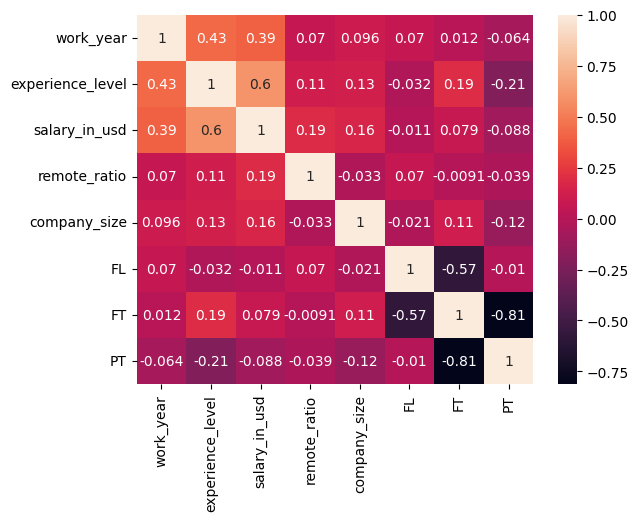

In [5]:
data_corr=data_scien.corr(numeric_only=True)
sns.heatmap(data_corr, annot=True)


Из таблицы мы видим,что на зарплату влияет: Опыт работы (сильно),так же сильно влияет рабочий график